# P4 
## cs4821 - cs5831 - s20 

<pre><b>Group Name:</b> P4-Black

<b>Members:</b> Diellza Malazogu</pre>

<h3>QUESTION 2 </h3>

In [33]:
import pandas as pd
import numpy as np
from sklearn import datasets # import standard datasets
from sklearn import tree     # decision tree classifier
from sklearn import naive_bayes # naive bayes classifier 
from sklearn import svm        # svm classifier
from sklearn import ensemble   # ensemble classifiers
from sklearn import metrics    # performance evaluation metrics
from sklearn import model_selection
from sklearn import preprocessing 
from sklearn import neighbors  # knn classifier
from sklearn.pipeline import make_pipeline
import graphviz
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [34]:
def minmaxNorm(trData,teData=None, minV=0,maxV=1):
    if not isinstance(trData,pd.DataFrame):
        trData=pd.DataFrame(data=trData)
    min_val = np.min(trData)
    max_val = np.max(trData)
    new_min=minV
    new_max=maxV
    trData = ((trData-min_val) / (max_val-min_val))*(new_max-new_min)+new_min
    if type(teData)!=type(None):
        if not isinstance(teData,pd.DataFrame):
            teData=pd.DataFrame(data=teData)
        teData = ((teData-min_val) / (max_val-min_val))*(new_max-new_min)+new_min
        return (trData,teData)
    else:
        return pd.DataFrame(data=trData)

In [35]:
def zscoreNorm(trData,teData=None, madFlag=0):
    if not isinstance(trData,pd.DataFrame):
        trData=pd.DataFrame(data=trData)
        
    if madFlag==True:
        if type(teData)!=type(None):
            if not isinstance(teData,pd.DataFrame):
                teData=pd.DataFrame(data=teData)
            teData= (teData - trData.mean())/trData.mad()
            trData= (trData - trData.mean())/trData.mad()
            return (trData,teData)
        else:
            trData= (trData - trData.mean())/trData.mad()
            return pd.DataFrame(data=trData)
    else:
        if type(teData)!=type(None):
            if not isinstance(teData,pd.DataFrame):
                teData=pd.DataFrame(data=teData)
            teData= (teData - trData.mean())/trData.std(ddof=1)
            trData= (trData - trData.mean())/trData.std(ddof=1)
            return (trData,teData)
        else:
            trData= (trData - trData.mean())/trData.std(ddof=1)
            return pd.DataFrame(data=trData)

<H3>TESTING</H3>

* Testing with list

In [36]:
in1 = [0, 1, 2, 5]
out1 = minmaxNorm(in1,minV=0, maxV=1)
out1

0
0  0.0
1  0.2
2  0.4
3  1.0

In [37]:
out2 = minmaxNorm(in1, teData=[2.5, -1, 3], minV=-1, maxV=1)
out2

(     0
 0 -1.0
 1 -0.6
 2 -0.2
 3  1.0,      0
 0  0.0
 1 -1.4
 2  0.2)

In [38]:
out1b = zscoreNorm(in1, teData=None, madFlag=0)
out1b

0
0 -0.92582
1 -0.46291
2  0.00000
3  1.38873

* Testing with numpy array 

In [39]:
in3 = np.array([0, 1, 2, 4, 8])
out3 = minmaxNorm(in3, None)
out3

0
0  0.000
1  0.125
2  0.250
3  0.500
4  1.000

* Testing with numpy matrix 

In [40]:
in4 = np.array([[1, 2, 3, 4], [2, 4, 5, 6], [3, 4, 6, 9]])
out4 = minmaxNorm(in4, None)
out4

0    1         2    3
0  0.0  0.0  0.000000  0.0
1  0.5  1.0  0.666667  0.4
2  1.0  1.0  1.000000  1.0

In [41]:
out5 = minmaxNorm(in4, np.array([[1, 3, 4, 5],  [3, 2, 5, 6]]))
out5

(     0    1         2    3
 0  0.0  0.0  0.000000  0.0
 1  0.5  1.0  0.666667  0.4
 2  1.0  1.0  1.000000  1.0,      0    1         2    3
 0  0.0  0.5  0.333333  0.2
 1  1.0  0.0  0.666667  0.4)

* Testing with pandas DataFrame

In [42]:
in6 = pd.DataFrame([[1, 2, 3, 4], [2, 4, 5, 6], [3, 4, 6, 9]])
out6 = minmaxNorm(in6, np.array([[2.5, 5, 4, 7]]), -1, 1)
out6



(     0    1         2    3
 0 -1.0 -1.0 -1.000000 -1.0
 1  0.0  1.0  0.333333 -0.2
 2  1.0  1.0  1.000000  1.0,      0    1         2    3
 0  0.5  2.0 -0.333333  0.2)

In [43]:
out6b = zscoreNorm(in6,np.array([[2.5, 5, 4, 7]]))
out6b

(     0         1         2         3
 0 -1.0 -1.154701 -1.091089 -0.927173
 1  0.0  0.577350  0.218218 -0.132453
 2  1.0  0.577350  0.872872  1.059626,      0         1         2         3
 0  0.5  1.443376 -0.436436  0.264906)

<h3>QUESTION 3 </h3>

In [44]:
def classifierPerf(Ypred,Ytrue):
        tp=0
        tn=0
        fp=0
        fn=0
        
        for i in range(0,len(Ytrue)):
            if (Ypred[i]==Ytrue[i] and Ypred[i]==1): #increase no.true positive
                tp+=1
            elif(Ypred[i]==Ytrue[i] and Ypred[i]==0): #increase no. true negative
                tn+=1
            elif(Ypred[i]!=Ytrue[i] and Ypred[i]==1): #increase no. false positive
                fp+=1
            elif(Ypred[i]!=Ytrue[i] and Ypred[i]==0): #increase no. false negative
                fn+=1
        try:
            tp_rate=tp/(tp+fn)  #True positive rate
            tn_rate=tn/(fp+tn)  #True negative rate
            fp_rate=fp/(fp+tn)  #False positive rate
            sensitivity=tp/(tp+fn) #Sensitivity/True positive rate
            specificity=tn/(fp+tn) #Specificity/True negative rate
            precision=tp/(tp+fp)  #Precision
            recall=tp/(tp+fn)  #Recall
            accuracy=(tp+tn)/(tp+fn+fp+tn) #Accuracy
            error_rate=(fp+fn)/(tp+fn+fp+tn)  #Error rate
        except:
            print('There is a division by Zero error.')
            return None
        
        try:
            sensitivity=tp/(tp+fn) #Sensitivity/True positive rate
            specificity=tn/(fp+tn) #Specificity/True negative rate
            precision=tp/(tp+fp)  #Precision
            recall=tp/(tp+fn)  #Recall
            accuracy=(tp+tn)/(tp+fn+fp+tn) #Accuracy
            error_rate=(fp+fn)/(tp+fn+fp+tn)  #Error rate
        except:
            print('There is a division by Zero error.')
            return None
            
        
        return tp,fp,tn,fn,tp_rate,tn_rate,fp_rate,accuracy,sensitivity,specificity,precision,recall,error_rate

<h3>QUESTION 4 </h3>

In [45]:
def threshold_pred(Ypred,Ytrue):
    tp_rate,fp_rate,acc=[],[],[]
    threshold=[0.0,0.3,0.4,0.6,0.7,0.8,0.85,0.9,0.95,0.97]
    tprate,fprate,accuracy=0,0,0
    for tval in threshold:
        pred_thr=[]
        for val in Ypred:
            if val>=tval:
                pred_thr.append(1)
            else:
                pred_thr.append(0)
        tprate=classifierPerf(pred_thr,Ytrue)[4]
        fprate=classifierPerf(pred_thr,Ytrue)[6]
        accuracy=classifierPerf(pred_thr,Ytrue)[7]
        tp_rate.append(tprate)
        fp_rate.append(fprate)
        acc.append(accuracy)
    result=pd.DataFrame({'Threshold':threshold,'True Positive Rate-TPR':tp_rate,'False Positive Rate-FPR':fp_rate,'Accuracy':acc })
    return result 

In [46]:
data=threshold_pred([0.98,0.92,0.85,0.77,0.71,0.64,0.50,0.39,0.34,0.31],[1,0,1,1,0,0,1,0,1,0])
data 

Threshold  True Positive Rate-TPR  False Positive Rate-FPR  Accuracy
0       0.00                     1.0                      1.0       0.5
1       0.30                     1.0                      1.0       0.5
2       0.40                     0.8                      0.6       0.6
3       0.60                     0.6                      0.6       0.5
4       0.70                     0.6                      0.4       0.6
5       0.80                     0.4                      0.2       0.6
6       0.85                     0.4                      0.2       0.6
7       0.90                     0.2                      0.2       0.5
8       0.95                     0.2                      0.0       0.6
9       0.97                     0.2                      0.0       0.6

Threshold values were taken as following: [0.0,0.3,0.4,0.6,0.7,0.8,0.85,0.9,0.95,0.97]

<h3>QUESTION 5 </h3>

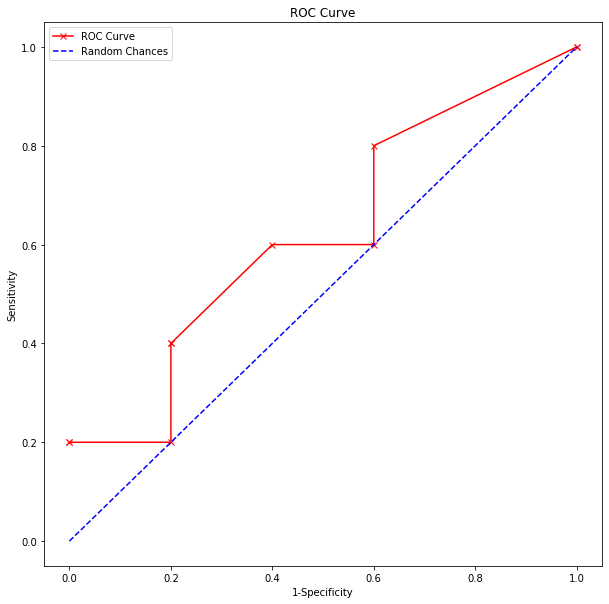

In [47]:
plt.figure(figsize=(10,10))
plt.plot(data['False Positive Rate-FPR'], data['True Positive Rate-TPR'],color='red', marker='x')
plt.plot([0,1],[0,1],color='blue', linestyle='dashed')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.legend(['ROC Curve','Random Chances'])
plt.title('ROC Curve')
plt.show()

<h3>QUESTION 6 A </h3>

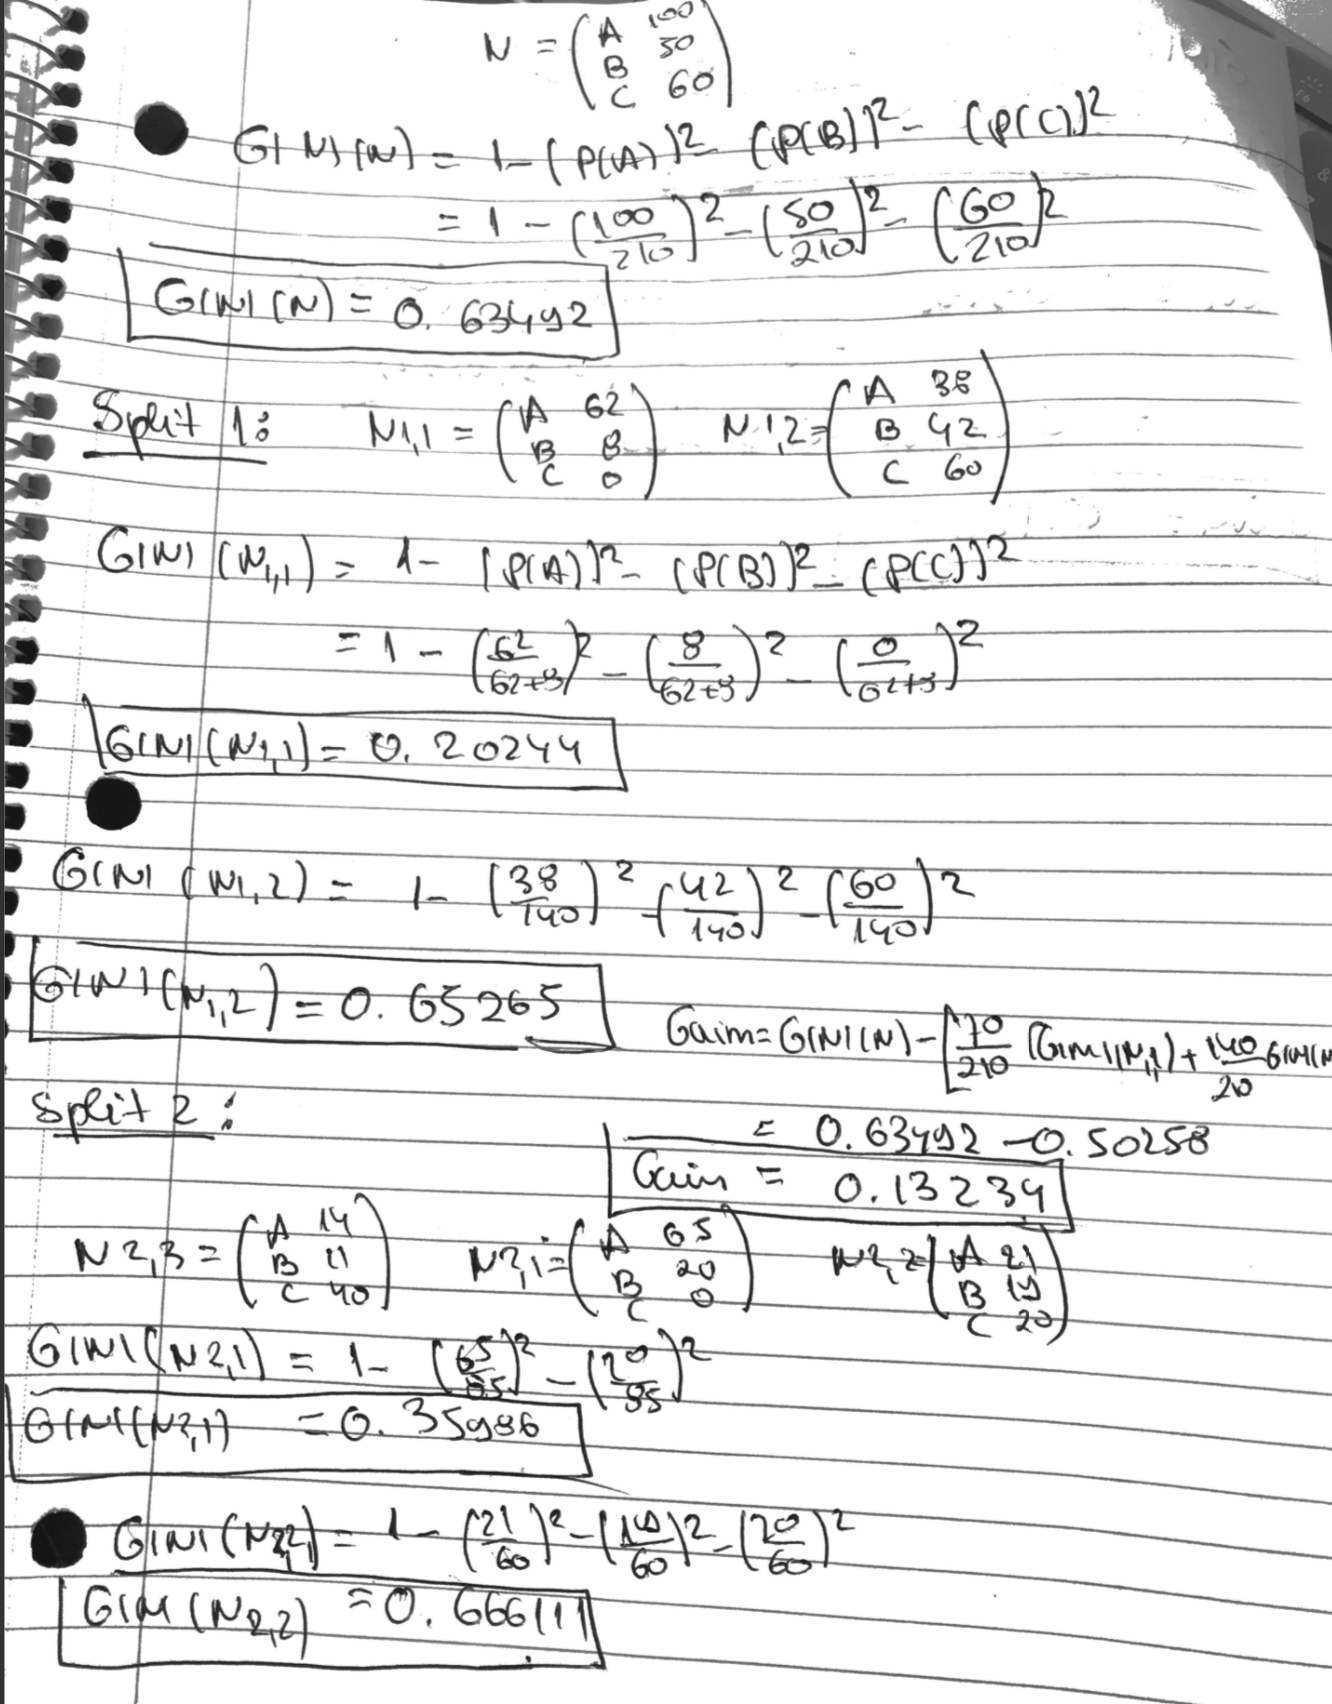

In [48]:
from IPython.display import Image
fig = Image(filename=('6A1.png'))
fig

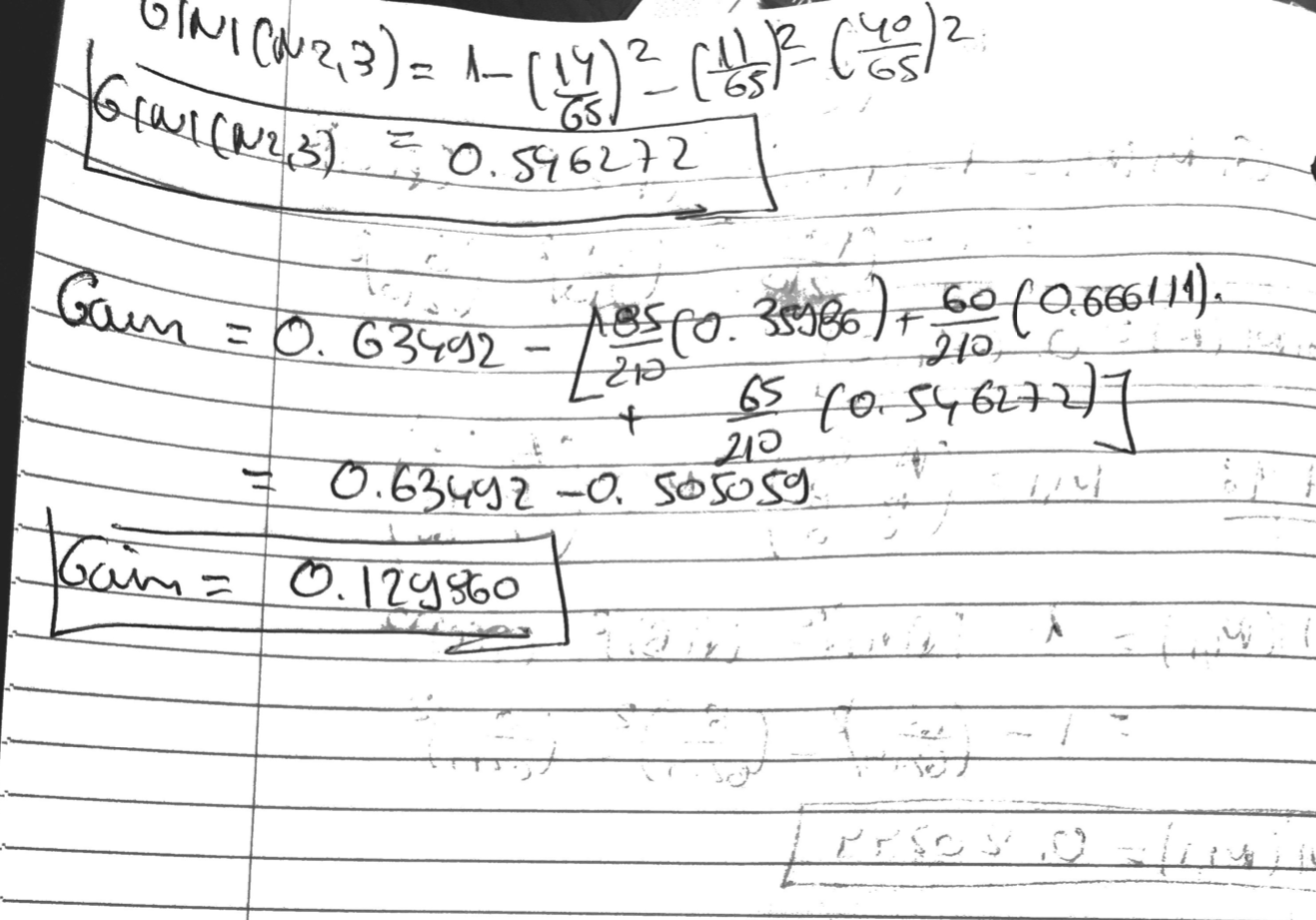

In [49]:
fig = Image(filename=('6A2.png'))
fig

<h3>QUESTION 6 B </h3>

By comparing gains for both of the splits since 0.13234>0.12986 then we conclude that Split 1 is the best split as a result Node 1 is prefered to be included in the next decision tree. 

<h3>QUESTION 6 C </h3>

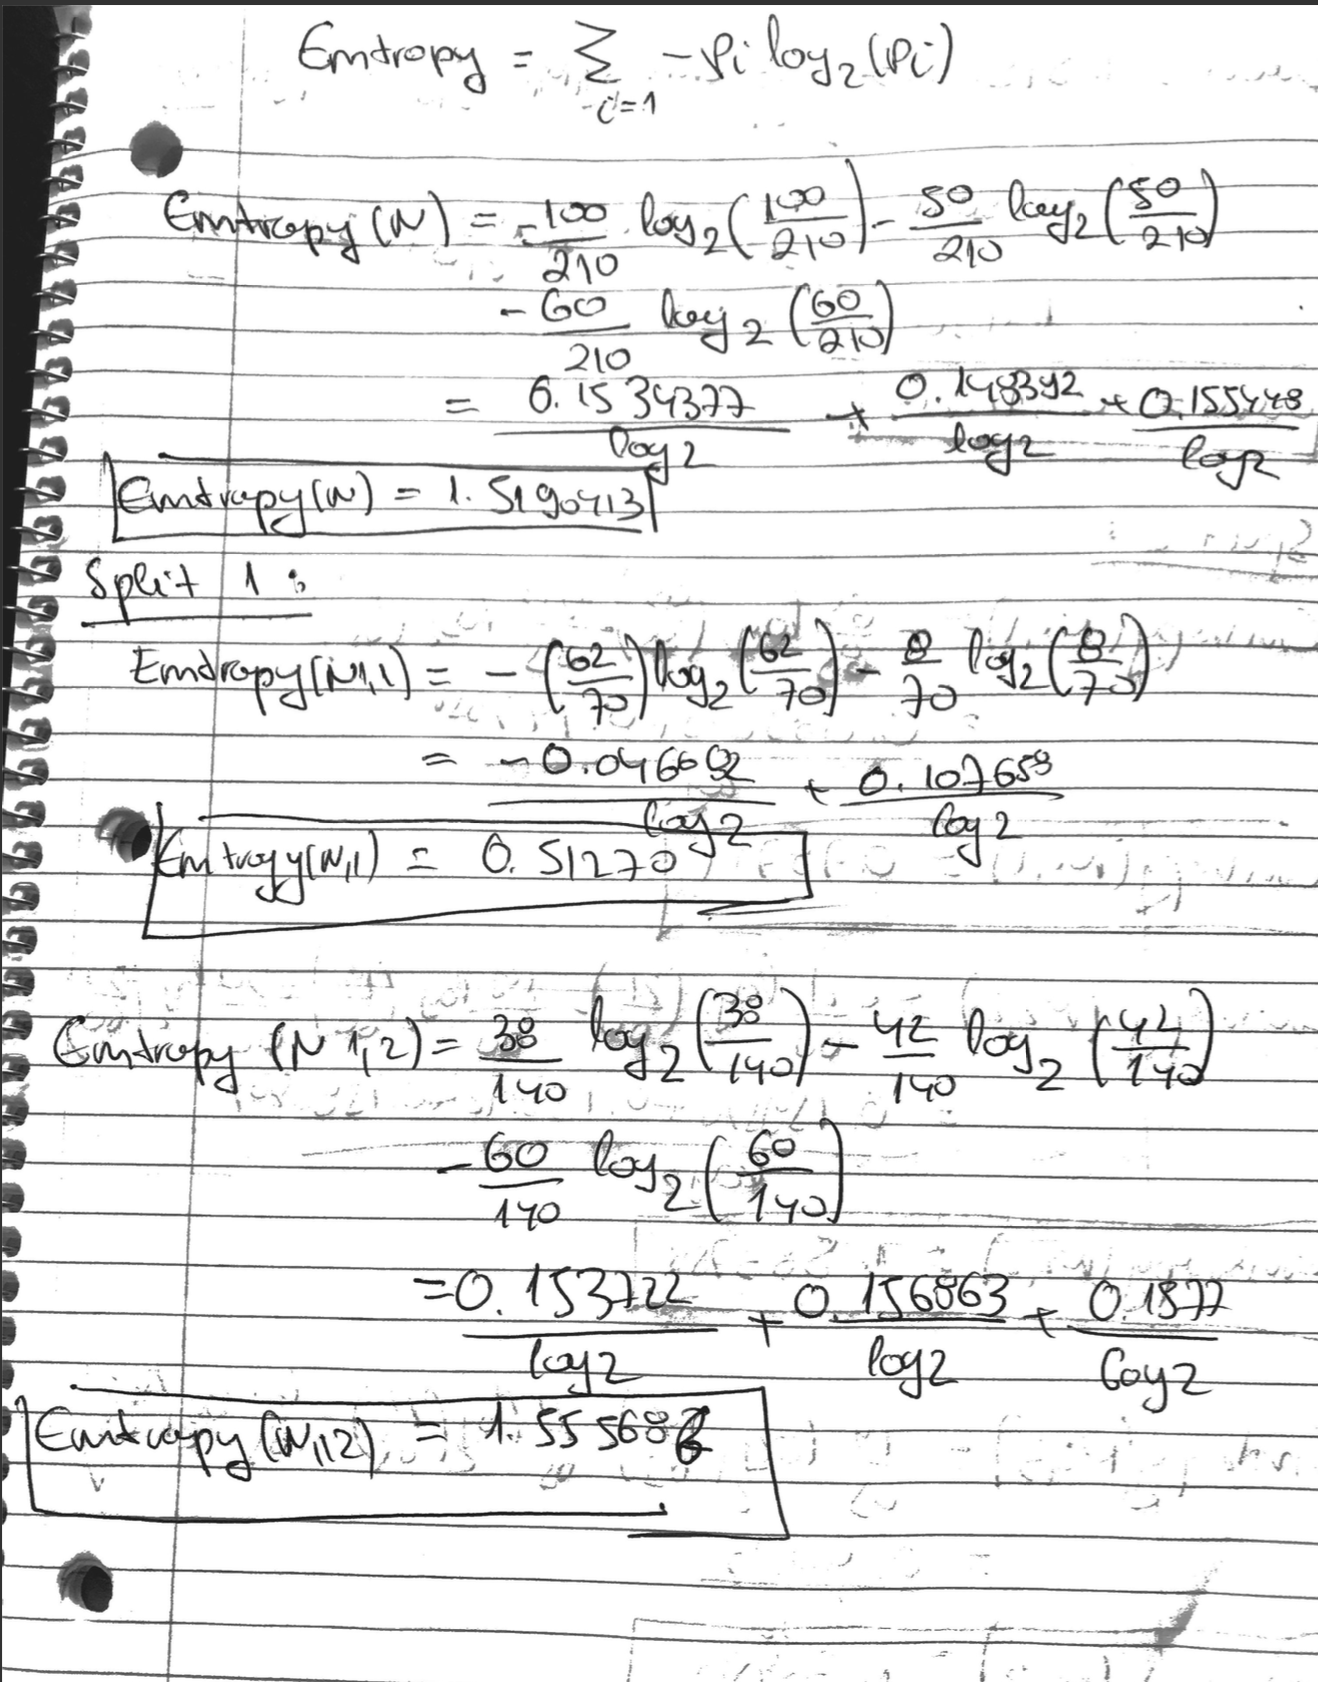

In [50]:
fig = Image(filename=('6C1.png'))
fig

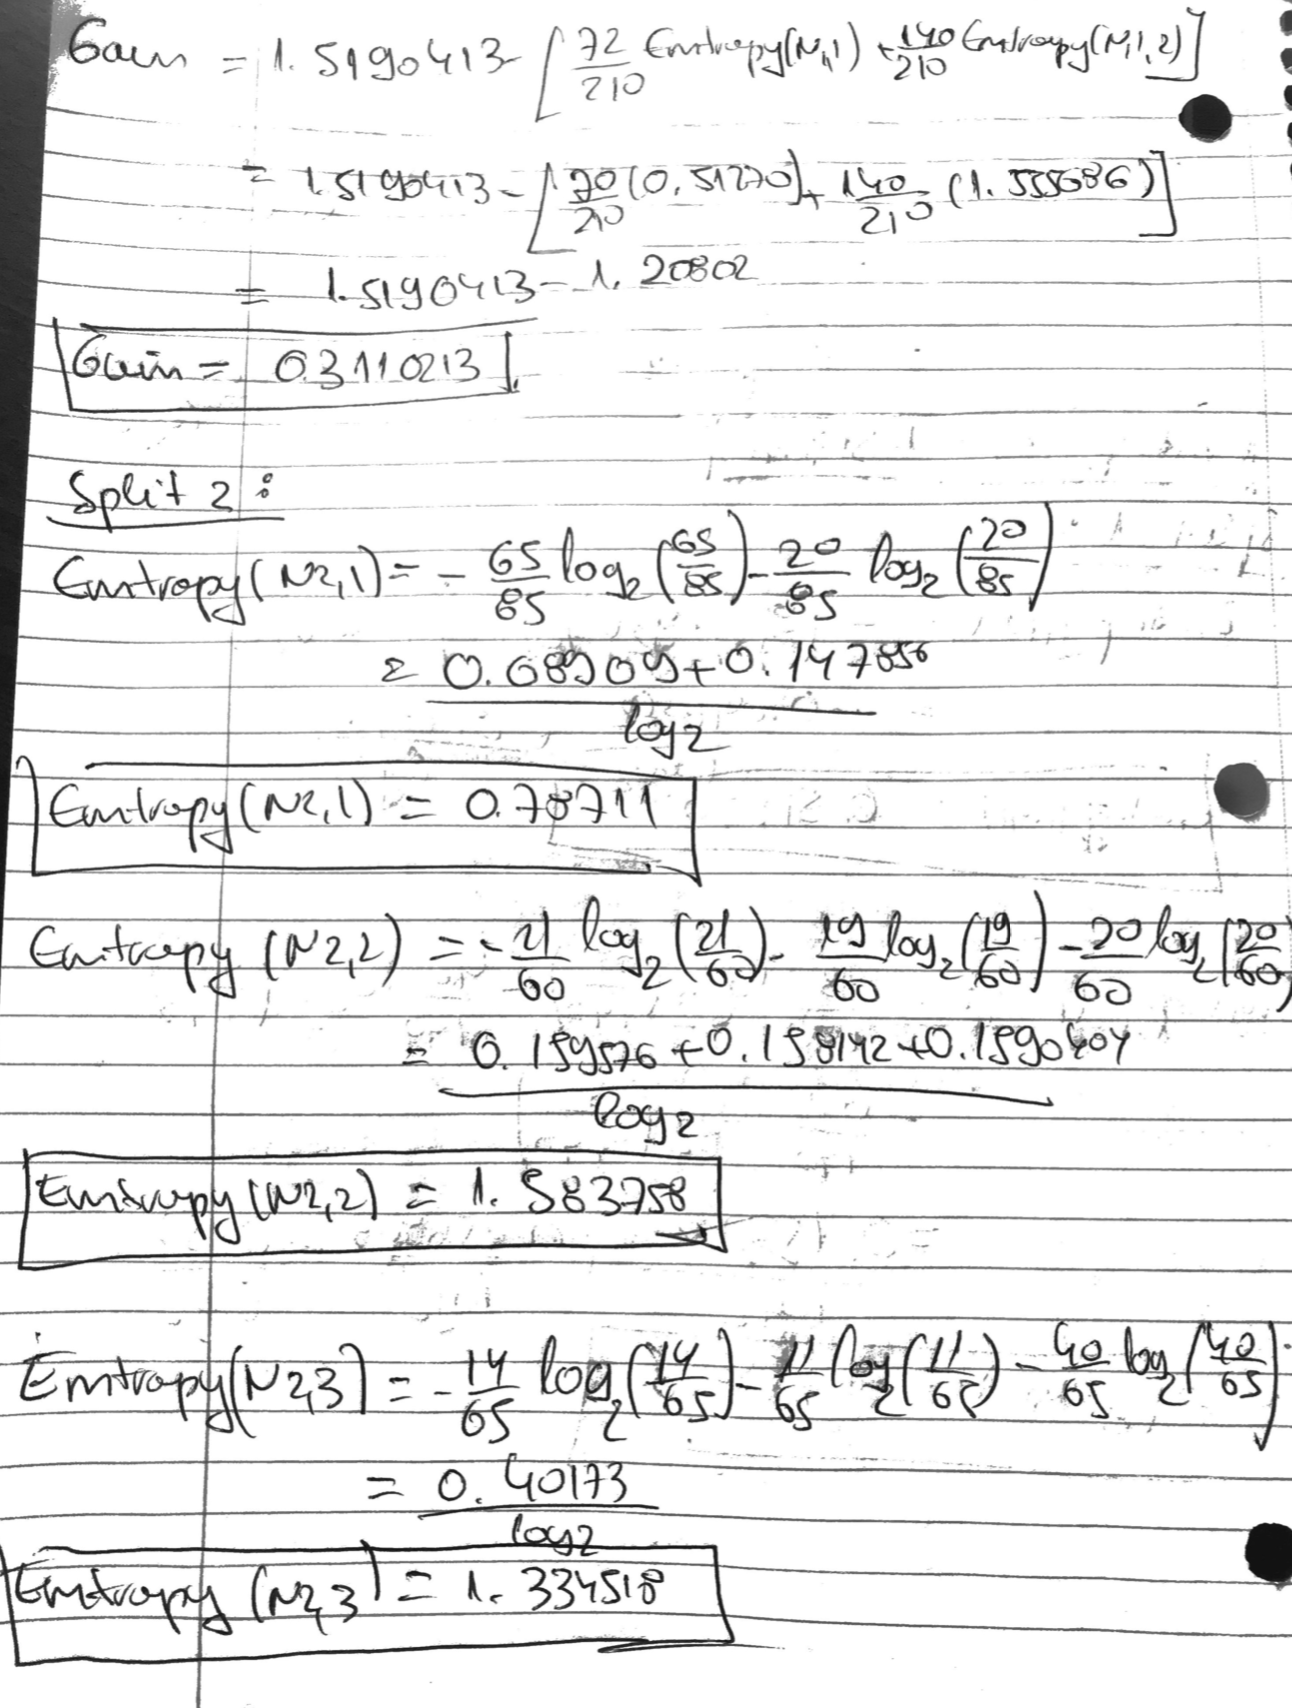

In [51]:
fig = Image(filename=('6C2.png'))
fig

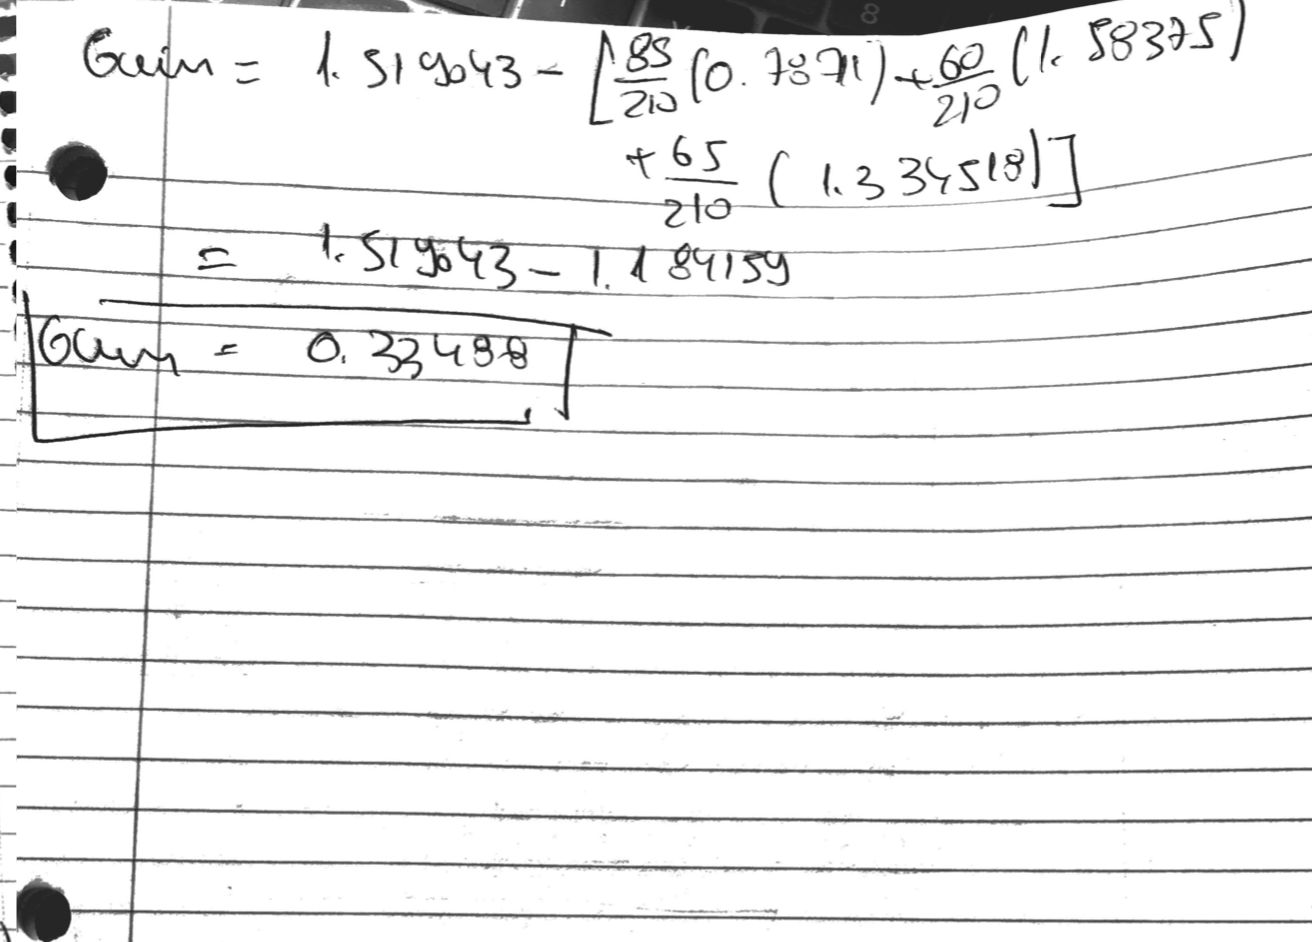

In [52]:
fig = Image(filename=('6C3.png'))
fig

<h3>QUESTION 6 D </h3>

By comparing gains for both of the splits since 0.3110213<0.33488 then we conclude that Split 2 is the best split as a result Node 2 is prefered to be included in the next decision tree. 

<h3>QUESTION 7 A </h3>

In [53]:
#import spam data
colNames = ['isuid','id','day of week','time of day','size.kb','box','domain','local','digits','name','cappct','special','credit','sucker','porn','chain','username','large text','spampct','category','spam']
myDataTemp = pd.read_csv("spam.csv", header = 0, names=colNames)
#pull specified columns
myData = myDataTemp[['day of week','time of day','size.kb','box','local','digits','name','special','credit','sucker','porn','chain','username','large text','spam']].copy()
myData.head()

day of week  time of day  size.kb  box local  digits  name  special credit  \
0         Thu            0        7   no    no       0  name        1     no   
1         Thu            0        2   no    no       0  name        5     no   
2         Thu           14        3   no   yes       0  name        2     no   
3         Thu            3        3  yes    no       0  name        0     no   
4         Thu            3        4   no    no       0  name        2     no   

  sucker porn chain username large text spam  
0     no   no    no       no         no   no  
1     no   no    no       no         no  yes  
2     no   no   yes       no         no   no  
3     no   no    no       no         no   no  
4     no   no    no       no         no   no

<h3>QUESTION 7 B </h3>

<b>I) What fraction of the e-mails are actually spam?</b>

In [54]:
spams = 0;
val = myData['spam'];
for i in range (1,len(myData.index)):
    if (val[i] == "yes"):
        spams = spams + 1;
    

print(str(spams/len(myData.index))+" fraction of the emails are actually spam")

0.327038231229848 fraction of the emails are actually spam


<b>II) What should the constant classifier predict?</b>

The constant classifier should predict if an email is a spam or not a spam.

<b>III) What is the error rate of constant classifier?</b>

* The error rate of constant classifier is 32.7 percent for all e-mails being classified as not spam
* The error rate of constant classifier is 67.3 percent for all e-mails being classified as spam

<h3>QUESTION 7 C </h3>

In [55]:
#convert data to numeric
myDataNumeric = myData.apply(lambda x: pd.factorize(x)[0])
#remove target class
X_spam = myDataNumeric.drop(["spam"], axis=1)
Y_spam = myDataNumeric[["spam"]].copy()
#gets training and test data seperate
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
    X_spam, Y_spam, test_size=0.20, random_state=4821)

<h3>QUESTION 7 D </h3>

In [56]:
dt = tree.DecisionTreeClassifier()
dtf = dt.fit(X_train, Y_train)

<h3>QUESTION 7 E </h3>

[Text(702.3487955729167, 529.2947368421053, 'X[3] <= 0.5\nentropy = 0.437\nsamples = 1736\nvalue = [1177, 559]\nclass = Not Spam'),
 Text(611.6142578125, 500.68421052631584, 'X[4] <= 0.5\nentropy = 0.46\nsamples = 843\nvalue = [302, 541]\nclass = Spam'),
 Text(517.978515625, 472.0736842105263, 'X[13] <= 0.5\nentropy = 0.345\nsamples = 685\nvalue = [152, 533]\nclass = Spam'),
 Text(390.1236979166667, 443.46315789473687, 'X[6] <= 0.5\nentropy = 0.457\nsamples = 411\nvalue = [145, 266]\nclass = Spam'),
 Text(271.0078125, 414.85263157894735, 'X[1] <= 16.5\nentropy = 0.497\nsamples = 245\nvalue = [113, 132]\nclass = Spam'),
 Text(156.453125, 386.2421052631579, 'X[1] <= 7.5\nentropy = 0.499\nsamples = 186\nvalue = [98, 88]\nclass = Not Spam'),
 Text(72.33333333333334, 357.63157894736844, 'X[12] <= 0.5\nentropy = 0.458\nsamples = 76\nvalue = [27, 49]\nclass = Spam'),
 Text(67.16666666666667, 329.021052631579, 'X[7] <= 2.5\nentropy = 0.481\nsamples = 67\nvalue = [27, 40]\nclass = Spam'),
 Text

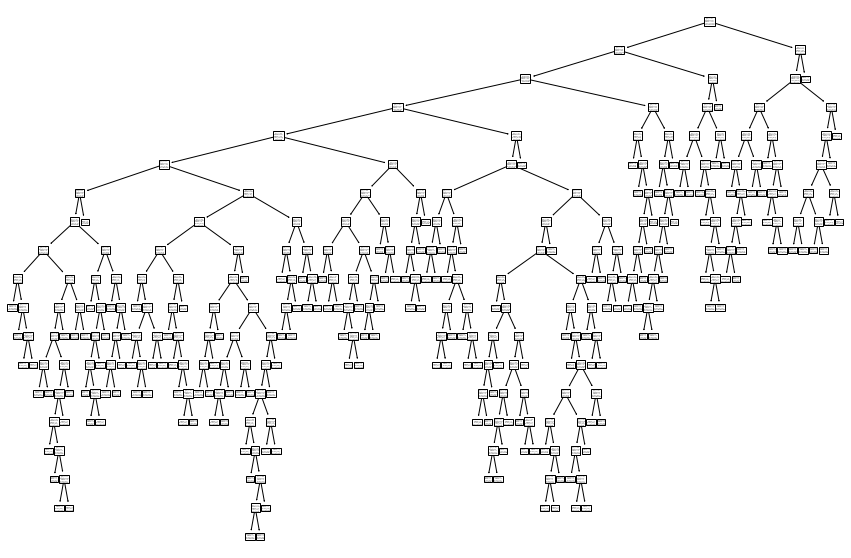

In [57]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtf, class_names=["Not Spam","Spam"])

* By default we have used the gini criterion to measure the quality of a split.

* The strategy used to choose the split at each node was by choosing the best split.

In [58]:
print('The number of Nodes in the constructed tree are: '+str(dt.tree_.node_count))

print('The number of Leaves in the constructed tree are: '+str(dt.tree_.n_leaves))

The number of Nodes in the constructed tree are: 351
The number of Leaves in the constructed tree are: 176


<h3>QUESTION 7 F </h3>

In [59]:
#calculate training accuracy and error rate
train_pred = dtf.predict(X_train)
score = metrics.accuracy_score(Y_train, train_pred)
print("Train Data Accuracy and Error_rate")
print("Accuracy: %.5f\nError Rate: %.5f" % (score,(1 - score)))

Train Data Accuracy and Error_rate
Accuracy: 0.99827
Error Rate: 0.00173


In [60]:
#calculate test accuracy and error rate
test_pred = dtf.predict(X_test)
score = metrics.accuracy_score(Y_test, test_pred)
print("Test Data Accuracy and Error_rate")
print("Accuracy: %.5f\nError Rate: %.5f" % (score,(1 - score)))

Test Data Accuracy and Error_rate
Accuracy: 0.90575
Error Rate: 0.09425


In [61]:
#calculate training AUC
score = metrics.roc_auc_score(Y_train, train_pred)
print("Train Data AUC")
print(score)

Train Data AUC
0.9973166368515205


In [62]:
#calcuate test AUC
score = metrics.roc_auc_score(Y_test, test_pred)
print("Test Data AUC")
print(score)

Test Data AUC
0.8921509187575786


<h3>QUESTION 7 G </h3>

[Text(482.8846153846154, 475.65000000000003, 'X[3] <= 0.5\nentropy = 0.437\nsamples = 1736\nvalue = [1177, 559]\nclass = Not Spam'),
 Text(257.53846153846155, 339.75, 'X[4] <= 0.5\nentropy = 0.46\nsamples = 843\nvalue = [302, 541]\nclass = Spam'),
 Text(128.76923076923077, 203.85000000000002, 'X[13] <= 0.5\nentropy = 0.345\nsamples = 685\nvalue = [152, 533]\nclass = Spam'),
 Text(64.38461538461539, 67.94999999999999, 'entropy = 0.457\nsamples = 411\nvalue = [145, 266]\nclass = Spam'),
 Text(193.15384615384616, 67.94999999999999, 'entropy = 0.05\nsamples = 274\nvalue = [7, 267]\nclass = Spam'),
 Text(386.3076923076923, 203.85000000000002, 'X[9] <= 0.5\nentropy = 0.096\nsamples = 158\nvalue = [150, 8]\nclass = Not Spam'),
 Text(321.9230769230769, 67.94999999999999, 'entropy = 0.038\nsamples = 153\nvalue = [150, 3]\nclass = Not Spam'),
 Text(450.69230769230774, 67.94999999999999, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = Spam'),
 Text(708.2307692307693, 339.75, 'X[5] <= 7.0\nen

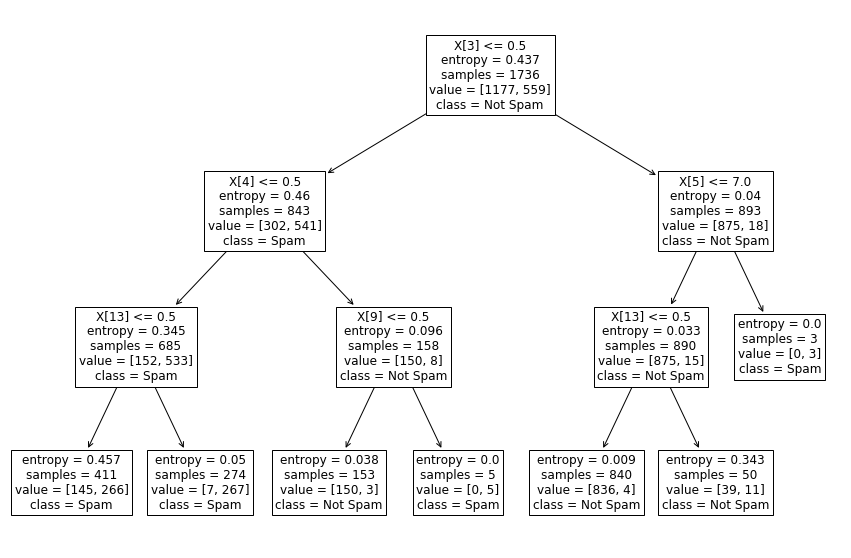

In [63]:
#create a pruned tree
dt2 = tree.DecisionTreeClassifier(max_depth=3)
dtf2 = dt2.fit(X_train, Y_train)
plt.figure(figsize=(15,10))
tree.plot_tree(dtf2, class_names=["Not Spam","Spam"])

Reporting Classification Performance for Tree with Max Depth=3 on Testing Data

In [64]:
#statistics with train case
train_pred2 = dtf2.predict(X_train)
score = metrics.accuracy_score(Y_train, train_pred2)
print("Accuracy: %.5f\nError Rate: %.5f" % (score,(1 - score)))

Accuracy: 0.90207
Error Rate: 0.09793


In [65]:
#calculate training AUC
score = metrics.roc_auc_score(Y_train, train_pred2)
print("AUC")
print(score)

AUC
0.9193288780335076


In [66]:
#Print Number of Nodes
print('Number of Nodes: '+str(dtf2.tree_.node_count))
#Print Number of Leaves
print('Number of Leaves: '+str(dtf2.tree_.n_leaves))

Number of Nodes: 13
Number of Leaves: 7


Reporting Classification Performance for Tree with Max Depth=5 on Testing Data

In [67]:
dt2 = tree.DecisionTreeClassifier(max_depth=5)
dtf2 = dt2.fit(X_train, Y_train)
train_pred2 = dtf2.predict(X_train)
score = metrics.accuracy_score(Y_train, train_pred2)
print("Accuracy: %.5f\nError Rate: %.5f" % (score,(1 - score)))

Accuracy: 0.90956
Error Rate: 0.09044


In [68]:
#calculate training AUC
score = metrics.roc_auc_score(Y_train, train_pred2)
print("AUC")
print(score)

AUC
0.8849315214235883


In [69]:
#Print Number of Nodes
print('Number of Nodes: '+str(dtf2.tree_.node_count))
#Print Number of Leaves
print('Number of Leaves: '+str(dtf2.tree_.n_leaves))

Number of Nodes: 41
Number of Leaves: 21


<h3>QUESTION 8 A </h3>

In [70]:
#prepare data for 10 fold cross-validation
nFolds = 10
kf = model_selection.KFold(n_splits=nFolds, shuffle=True, random_state=3)

<h3>QUESTION 8 B </h3>

In [71]:
knn_kcv_scores = []
knn_kcv_auc = []
#kNN with a k of 3
print("kNN with a k of 3")
for tr_indx, te_indx in kf.split(X_spam, Y_spam):
    x_train, x_test = X_spam.iloc[tr_indx], X_spam.iloc[te_indx]
    y_train, y_test = Y_spam.iloc[tr_indx], Y_spam.iloc[te_indx]
    # Scale the data 
    #scaler = preprocessing.StandardScaler().fit(x_train)
    #X_train_transformed = scaler.transform(x_train)
    #X_test_transformed = scaler.transform(x_test)
    knn = neighbors.KNeighborsClassifier(n_neighbors=3)
    knn.fit(x_train, y_train)
    y_pred_te = knn.predict(x_test)
    knn_kcv_scores.append(metrics.accuracy_score(y_test, y_pred_te))
    knn_kcv_auc.append(metrics.roc_auc_score(y_test, y_pred_te))
j = 0;
for i in knn_kcv_scores:
    print("Fold %d accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (j, knn_kcv_scores[j], 1 - knn_kcv_scores[j], knn_kcv_auc[j]))
    j = j + 1
print("Overall accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (np.mean(knn_kcv_scores), 1-np.mean(knn_kcv_scores),np.mean(knn_kcv_auc)))

kNN with a k of 3
Fold 0 accuracy: 0.8165, error rate: 0.1835, AUC: 0.7777
Fold 1 accuracy: 0.8157, error rate: 0.1843, AUC: 0.7699
Fold 2 accuracy: 0.7926, error rate: 0.2074, AUC: 0.7283
Fold 3 accuracy: 0.7558, error rate: 0.2442, AUC: 0.7078
Fold 4 accuracy: 0.8111, error rate: 0.1889, AUC: 0.7329
Fold 5 accuracy: 0.7604, error rate: 0.2396, AUC: 0.7018
Fold 6 accuracy: 0.7419, error rate: 0.2581, AUC: 0.6925
Fold 7 accuracy: 0.8249, error rate: 0.1751, AUC: 0.7554
Fold 8 accuracy: 0.7972, error rate: 0.2028, AUC: 0.7560
Fold 9 accuracy: 0.8249, error rate: 0.1751, AUC: 0.7781
Overall accuracy: 0.7941, error rate: 0.2059, AUC: 0.7400


In [72]:
knn_kcv_scores = []
knn_kcv_auc = []
print("kNN with a k of 5")
#kNN with a k of 5
for tr_indx, te_indx in kf.split(X_spam, Y_spam):
    x_train, x_test = X_spam.iloc[tr_indx], X_spam.iloc[te_indx]
    y_train, y_test = Y_spam.iloc[tr_indx], Y_spam.iloc[te_indx]
    # Scale the data 
    #scaler = preprocessing.StandardScaler().fit(x_train)
    #X_train_transformed = scaler.transform(x_train)
    #X_test_transformed = scaler.transform(x_test)
    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    knn.fit(x_train, y_train)
    y_pred_te = knn.predict(x_test)
    knn_kcv_scores.append(metrics.accuracy_score(y_test, y_pred_te))
    knn_kcv_auc.append(metrics.roc_auc_score(y_test, y_pred_te))
j = 0;
for i in knn_kcv_scores:
    print("Fold %d accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (j, knn_kcv_scores[j], 1 - knn_kcv_scores[j], knn_kcv_auc[j]))
    j = j + 1
print("Overall accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (np.mean(knn_kcv_scores), 1-np.mean(knn_kcv_scores),np.mean(knn_kcv_auc)))    

kNN with a k of 5
Fold 0 accuracy: 0.7661, error rate: 0.2339, AUC: 0.7171
Fold 1 accuracy: 0.8387, error rate: 0.1613, AUC: 0.7974
Fold 2 accuracy: 0.7926, error rate: 0.2074, AUC: 0.7283
Fold 3 accuracy: 0.7327, error rate: 0.2673, AUC: 0.6791
Fold 4 accuracy: 0.7880, error rate: 0.2120, AUC: 0.6883
Fold 5 accuracy: 0.7742, error rate: 0.2258, AUC: 0.6912
Fold 6 accuracy: 0.7327, error rate: 0.2673, AUC: 0.6748
Fold 7 accuracy: 0.8295, error rate: 0.1705, AUC: 0.7432
Fold 8 accuracy: 0.7788, error rate: 0.2212, AUC: 0.7286
Fold 9 accuracy: 0.8065, error rate: 0.1935, AUC: 0.7546
Overall accuracy: 0.7840, error rate: 0.2160, AUC: 0.7203


In [73]:
knn_kcv_scores = []
knn_kcv_auc = []
#kNN with a k of 7
print("kNN with a k of 7")
for tr_indx, te_indx in kf.split(X_spam, Y_spam):
    x_train, x_test = X_spam.iloc[tr_indx], X_spam.iloc[te_indx]
    y_train, y_test = Y_spam.iloc[tr_indx], Y_spam.iloc[te_indx]
    # Scale the data 
    #scaler = preprocessing.StandardScaler().fit(x_train)
    #X_train_transformed = scaler.transform(x_train)
    #X_test_transformed = scaler.transform(x_test)
    knn = neighbors.KNeighborsClassifier(n_neighbors=7)
    knn.fit(x_train, y_train)
    y_pred_te = knn.predict(x_test)
    knn_kcv_scores.append(metrics.accuracy_score(y_test, y_pred_te))
    knn_kcv_auc.append(metrics.roc_auc_score(y_test, y_pred_te))
j = 0;
for i in knn_kcv_scores:
    print("Fold %d accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (j, knn_kcv_scores[j], 1 - knn_kcv_scores[j], knn_kcv_auc[j]))
    j = j + 1
print("Overall accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (np.mean(knn_kcv_scores), 1-np.mean(knn_kcv_scores),np.mean(knn_kcv_auc)))

kNN with a k of 7
Fold 0 accuracy: 0.7385, error rate: 0.2615, AUC: 0.6644
Fold 1 accuracy: 0.8295, error rate: 0.1705, AUC: 0.7736
Fold 2 accuracy: 0.7880, error rate: 0.2120, AUC: 0.7216
Fold 3 accuracy: 0.7189, error rate: 0.2811, AUC: 0.6578
Fold 4 accuracy: 0.8203, error rate: 0.1797, AUC: 0.7217
Fold 5 accuracy: 0.7788, error rate: 0.2212, AUC: 0.6981
Fold 6 accuracy: 0.7235, error rate: 0.2765, AUC: 0.6534
Fold 7 accuracy: 0.8065, error rate: 0.1935, AUC: 0.6963
Fold 8 accuracy: 0.7558, error rate: 0.2442, AUC: 0.7012
Fold 9 accuracy: 0.7926, error rate: 0.2074, AUC: 0.7315
Overall accuracy: 0.7752, error rate: 0.2248, AUC: 0.7020


In [74]:
knn_kcv_scores = []
knn_kcv_auc = []
#kNN with a k of 13
print("kNN with a k of 13")
for tr_indx, te_indx in kf.split(X_spam, Y_spam):
    x_train, x_test = X_spam.iloc[tr_indx], X_spam.iloc[te_indx]
    y_train, y_test = Y_spam.iloc[tr_indx], Y_spam.iloc[te_indx]
    # Scale the data 
    #scaler = preprocessing.StandardScaler().fit(x_train)
    #X_train_transformed = scaler.transform(x_train)
    #X_test_transformed = scaler.transform(x_test)
    knn = neighbors.KNeighborsClassifier(n_neighbors=13)
    knn.fit(x_train, y_train)
    y_pred_te = knn.predict(x_test)
    knn_kcv_scores.append(metrics.accuracy_score(y_test, y_pred_te))
    knn_kcv_auc.append(metrics.roc_auc_score(y_test, y_pred_te))
j = 0;
for i in knn_kcv_scores:
    print("Fold %d accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (j, knn_kcv_scores[j], 1 - knn_kcv_scores[j], knn_kcv_auc[j]))
    j = j + 1
print("Overall accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (np.mean(knn_kcv_scores), 1-np.mean(knn_kcv_scores),np.mean(knn_kcv_auc)))

kNN with a k of 13
Fold 0 accuracy: 0.7385, error rate: 0.2615, AUC: 0.6580
Fold 1 accuracy: 0.8111, error rate: 0.1889, AUC: 0.7428
Fold 2 accuracy: 0.7696, error rate: 0.2304, AUC: 0.6824
Fold 3 accuracy: 0.7281, error rate: 0.2719, AUC: 0.6547
Fold 4 accuracy: 0.8065, error rate: 0.1935, AUC: 0.6832
Fold 5 accuracy: 0.7512, error rate: 0.2488, AUC: 0.6530
Fold 6 accuracy: 0.7327, error rate: 0.2673, AUC: 0.6494
Fold 7 accuracy: 0.7834, error rate: 0.2166, AUC: 0.6444
Fold 8 accuracy: 0.7788, error rate: 0.2212, AUC: 0.7118
Fold 9 accuracy: 0.7512, error rate: 0.2488, AUC: 0.6715
Overall accuracy: 0.7651, error rate: 0.2349, AUC: 0.6751


In [75]:
knn_kcv_scores = []
knn_kcv_auc = []
#kNN with a k of 21
print("kNN with a k of 21")
for tr_indx, te_indx in kf.split(X_spam, Y_spam):
    x_train, x_test = X_spam.iloc[tr_indx], X_spam.iloc[te_indx]
    y_train, y_test = Y_spam.iloc[tr_indx], Y_spam.iloc[te_indx]
    # Scale the data 
    #scaler = preprocessing.StandardScaler().fit(x_train)
    #X_train_transformed = scaler.transform(x_train)
    #X_test_transformed = scaler.transform(x_test)
    knn = neighbors.KNeighborsClassifier(n_neighbors=21)
    knn.fit(x_train, y_train)
    y_pred_te = knn.predict(x_test)
    knn_kcv_scores.append(metrics.accuracy_score(y_test, y_pred_te))
    knn_kcv_auc.append(metrics.roc_auc_score(y_test, y_pred_te))
j = 0;
for i in knn_kcv_scores:
    print("Fold %d accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (j, knn_kcv_scores[j], 1 - knn_kcv_scores[j], knn_kcv_auc[j]))
    j = j + 1
print("Overall accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (np.mean(knn_kcv_scores), 1-np.mean(knn_kcv_scores),np.mean(knn_kcv_auc)))

kNN with a k of 21
Fold 0 accuracy: 0.7156, error rate: 0.2844, AUC: 0.6215
Fold 1 accuracy: 0.7880, error rate: 0.2120, AUC: 0.7052
Fold 2 accuracy: 0.7373, error rate: 0.2627, AUC: 0.6389
Fold 3 accuracy: 0.7051, error rate: 0.2949, AUC: 0.6234
Fold 4 accuracy: 0.7880, error rate: 0.2120, AUC: 0.6359
Fold 5 accuracy: 0.7373, error rate: 0.2627, AUC: 0.6356
Fold 6 accuracy: 0.7512, error rate: 0.2488, AUC: 0.6595
Fold 7 accuracy: 0.7650, error rate: 0.2350, AUC: 0.6213
Fold 8 accuracy: 0.7880, error rate: 0.2120, AUC: 0.7153
Fold 9 accuracy: 0.7465, error rate: 0.2535, AUC: 0.6554
Overall accuracy: 0.7522, error rate: 0.2478, AUC: 0.6512


<h3>QUESTION 8 C </h3>

In [76]:
tree_kcv_scores = []
tree_kcv_auc = []
#Decision tree with max depth 4
print("Decision tree with max depth 4")
for tr_indx, te_indx in kf.split(X_spam, Y_spam):
    x_train, x_test = X_spam.iloc[tr_indx], X_spam.iloc[te_indx]
    y_train, y_test = Y_spam.iloc[tr_indx], Y_spam.iloc[te_indx]
    dt = tree.DecisionTreeClassifier(max_depth=4)
    dtf = dt.fit(x_train, y_train)
    y_pred_te = dtf.predict(x_test)
    tree_kcv_scores.append(metrics.accuracy_score(y_test, y_pred_te))
    tree_kcv_auc.append(metrics.roc_auc_score(y_test, y_pred_te))
j = 0;
for i in tree_kcv_scores:
    print("Fold %d accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (j, tree_kcv_scores[j], 1 - tree_kcv_scores[j], tree_kcv_auc[j]))
    j = j + 1
print("Overall accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (np.mean(tree_kcv_scores), 1-np.mean(tree_kcv_scores),np.mean(tree_kcv_auc)))

Decision tree with max depth 4
Fold 0 accuracy: 0.8945, error rate: 0.1055, AUC: 0.9164
Fold 1 accuracy: 0.9263, error rate: 0.0737, AUC: 0.9377
Fold 2 accuracy: 0.8802, error rate: 0.1198, AUC: 0.8959
Fold 3 accuracy: 0.8756, error rate: 0.1244, AUC: 0.8885
Fold 4 accuracy: 0.8710, error rate: 0.1290, AUC: 0.8956
Fold 5 accuracy: 0.8986, error rate: 0.1014, AUC: 0.9171
Fold 6 accuracy: 0.8848, error rate: 0.1152, AUC: 0.8963
Fold 7 accuracy: 0.9217, error rate: 0.0783, AUC: 0.9407
Fold 8 accuracy: 0.9032, error rate: 0.0968, AUC: 0.9203
Fold 9 accuracy: 0.9493, error rate: 0.0507, AUC: 0.9518
Overall accuracy: 0.9005, error rate: 0.0995, AUC: 0.9160


In [77]:
tree_kcv_scores = []
tree_kcv_auc = []
#Decision tree with max depth 3
print("Decision tree with max depth 3")
for tr_indx, te_indx in kf.split(X_spam, Y_spam):
    x_train, x_test = X_spam.iloc[tr_indx], X_spam.iloc[te_indx]
    y_train, y_test = Y_spam.iloc[tr_indx], Y_spam.iloc[te_indx]
    dt = tree.DecisionTreeClassifier(max_depth=3)
    dtf = dt.fit(x_train, y_train)
    y_pred_te = dtf.predict(x_test)
    tree_kcv_scores.append(metrics.accuracy_score(y_test, y_pred_te))
    tree_kcv_auc.append(metrics.roc_auc_score(y_test, y_pred_te))
j = 0;
for i in tree_kcv_scores:
    print("Fold %d accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (j, tree_kcv_scores[j], 1 - tree_kcv_scores[j], tree_kcv_auc[j]))
    j = j + 1
print("Overall accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (np.mean(tree_kcv_scores), 1-np.mean(tree_kcv_scores),np.mean(tree_kcv_auc)))

Decision tree with max depth 3
Fold 0 accuracy: 0.8945, error rate: 0.1055, AUC: 0.9164
Fold 1 accuracy: 0.9263, error rate: 0.0737, AUC: 0.9377
Fold 2 accuracy: 0.8802, error rate: 0.1198, AUC: 0.8959
Fold 3 accuracy: 0.8664, error rate: 0.1336, AUC: 0.8760
Fold 4 accuracy: 0.8710, error rate: 0.1290, AUC: 0.8956
Fold 5 accuracy: 0.8986, error rate: 0.1014, AUC: 0.9171
Fold 6 accuracy: 0.8848, error rate: 0.1152, AUC: 0.8963
Fold 7 accuracy: 0.9217, error rate: 0.0783, AUC: 0.9407
Fold 8 accuracy: 0.9032, error rate: 0.0968, AUC: 0.9203
Fold 9 accuracy: 0.9493, error rate: 0.0507, AUC: 0.9518
Overall accuracy: 0.8996, error rate: 0.1004, AUC: 0.9148


<h3>QUESTION 8 D </h3>

In [78]:
nb_kcv_scores = []
nb_kcv_auc = []
#Naive Bayes
print("Naive Bayes")
for tr_indx, te_indx in kf.split(X_spam, Y_spam):
    x_train, x_test = X_spam.iloc[tr_indx], X_spam.iloc[te_indx]
    y_train, y_test = Y_spam.iloc[tr_indx], Y_spam.iloc[te_indx]
    gnb = naive_bayes.GaussianNB()
    y_pred_te = gnb.fit(x_train, y_train).predict(x_test)
    nb_kcv_scores.append(metrics.accuracy_score(y_test, y_pred_te))
    nb_kcv_auc.append(metrics.roc_auc_score(y_test, y_pred_te))
j = 0;
for i in nb_kcv_scores:
    print("Fold %d accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (j, nb_kcv_scores[j], 1 - nb_kcv_scores[j], nb_kcv_auc[j]))
    j = j + 1
print("Overall accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (np.mean(nb_kcv_scores), 1-np.mean(nb_kcv_scores),np.mean(nb_kcv_auc)))

Naive Bayes
Fold 0 accuracy: 0.8532, error rate: 0.1468, AUC: 0.8279
Fold 1 accuracy: 0.9124, error rate: 0.0876, AUC: 0.8834
Fold 2 accuracy: 0.9124, error rate: 0.0876, AUC: 0.8828
Fold 3 accuracy: 0.8710, error rate: 0.1290, AUC: 0.8432
Fold 4 accuracy: 0.8848, error rate: 0.1152, AUC: 0.8175
Fold 5 accuracy: 0.8756, error rate: 0.1244, AUC: 0.8195
Fold 6 accuracy: 0.9078, error rate: 0.0922, AUC: 0.8809
Fold 7 accuracy: 0.8894, error rate: 0.1106, AUC: 0.8257
Fold 8 accuracy: 0.8848, error rate: 0.1152, AUC: 0.8490
Fold 9 accuracy: 0.8710, error rate: 0.1290, AUC: 0.8322
Overall accuracy: 0.8862, error rate: 0.1138, AUC: 0.8462


<h3>QUESTION 8 E </h3>

In [79]:
svm_kcv_scores = []
svm_kcv_auc = []
#SVM with cost 0.01 and linear kernel
print("SVM with cost 0.01 and linear kernel")
for tr_indx, te_indx in kf.split(X_spam, Y_spam):
    x_train, x_test = X_spam.iloc[tr_indx], X_spam.iloc[te_indx]
    y_train, y_test = Y_spam.iloc[tr_indx], Y_spam.iloc[te_indx]
    svmclf = svm.SVC(kernel='linear', C=0.01)
    svmclf.fit(x_train, y_train)
    y_pred_te = svmclf.predict(x_test)
    svm_kcv_scores.append(metrics.accuracy_score(y_test, y_pred_te))
    svm_kcv_auc.append(metrics.roc_auc_score(y_test, y_pred_te))
j = 0;
for i in svm_kcv_scores:
    print("Fold %d accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (j, svm_kcv_scores[j], 1 - svm_kcv_scores[j], svm_kcv_auc[j]))
    j = j + 1
print("Overall accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (np.mean(svm_kcv_scores), 1-np.mean(svm_kcv_scores),np.mean(svm_kcv_auc)))

SVM with cost 0.01 and linear kernel
Fold 0 accuracy: 0.9128, error rate: 0.0872, AUC: 0.9114
Fold 1 accuracy: 0.9309, error rate: 0.0691, AUC: 0.9108
Fold 2 accuracy: 0.8802, error rate: 0.1198, AUC: 0.8959
Fold 3 accuracy: 0.8894, error rate: 0.1106, AUC: 0.8734
Fold 4 accuracy: 0.8664, error rate: 0.1336, AUC: 0.8925
Fold 5 accuracy: 0.9124, error rate: 0.0876, AUC: 0.8890
Fold 6 accuracy: 0.9309, error rate: 0.0691, AUC: 0.9197
Fold 7 accuracy: 0.9078, error rate: 0.0922, AUC: 0.9209
Fold 8 accuracy: 0.9032, error rate: 0.0968, AUC: 0.8866
Fold 9 accuracy: 0.9309, error rate: 0.0691, AUC: 0.9063
Overall accuracy: 0.9065, error rate: 0.0935, AUC: 0.9006


In [80]:
svm_kcv_scores = []
svm_kcv_auc = []
#SVM with cost 0.1 and linear kernel
print("SVM with cost 0.1 and linear kernel")
for tr_indx, te_indx in kf.split(X_spam, Y_spam):
    x_train, x_test = X_spam.iloc[tr_indx], X_spam.iloc[te_indx]
    y_train, y_test = Y_spam.iloc[tr_indx], Y_spam.iloc[te_indx]
    svmclf = svm.SVC(kernel='linear', C=0.1)
    svmclf.fit(x_train, y_train)
    y_pred_te = svmclf.predict(x_test)
    svm_kcv_scores.append(metrics.accuracy_score(y_test, y_pred_te))
    svm_kcv_auc.append(metrics.roc_auc_score(y_test, y_pred_te))
j = 0;
for i in svm_kcv_scores:
    print("Fold %d accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (j, svm_kcv_scores[j], 1 - svm_kcv_scores[j], svm_kcv_auc[j]))
    j = j + 1
print("Overall accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (np.mean(svm_kcv_scores), 1-np.mean(svm_kcv_scores),np.mean(svm_kcv_auc)))

SVM with cost 0.1 and linear kernel
Fold 0 accuracy: 0.8945, error rate: 0.1055, AUC: 0.9164
Fold 1 accuracy: 0.9263, error rate: 0.0737, AUC: 0.9377
Fold 2 accuracy: 0.8710, error rate: 0.1290, AUC: 0.8825
Fold 3 accuracy: 0.8756, error rate: 0.1244, AUC: 0.8807
Fold 4 accuracy: 0.8710, error rate: 0.1290, AUC: 0.8956
Fold 5 accuracy: 0.8940, error rate: 0.1060, AUC: 0.9102
Fold 6 accuracy: 0.8848, error rate: 0.1152, AUC: 0.8963
Fold 7 accuracy: 0.9124, error rate: 0.0876, AUC: 0.9240
Fold 8 accuracy: 0.8940, error rate: 0.1060, AUC: 0.9066
Fold 9 accuracy: 0.9493, error rate: 0.0507, AUC: 0.9518
Overall accuracy: 0.8973, error rate: 0.1027, AUC: 0.9102


In [81]:
svm_kcv_scores = []
svm_kcv_auc = []
#SVM with cost 1 and linear kernel
print("SVM with cost 1 and linear kernel")
for tr_indx, te_indx in kf.split(X_spam, Y_spam):
    x_train, x_test = X_spam.iloc[tr_indx], X_spam.iloc[te_indx]
    y_train, y_test = Y_spam.iloc[tr_indx], Y_spam.iloc[te_indx]
    svmclf = svm.SVC(kernel='linear', C=1)
    svmclf.fit(x_train, y_train)
    y_pred_te = svmclf.predict(x_test)
    svm_kcv_scores.append(metrics.accuracy_score(y_test, y_pred_te))
    svm_kcv_auc.append(metrics.roc_auc_score(y_test, y_pred_te))
j = 0;
for i in svm_kcv_scores:
    print("Fold %d accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (j, svm_kcv_scores[j], 1 - svm_kcv_scores[j], svm_kcv_auc[j]))
    j = j + 1
print("Overall accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (np.mean(svm_kcv_scores), 1-np.mean(svm_kcv_scores),np.mean(svm_kcv_auc)))

SVM with cost 1 and linear kernel
Fold 0 accuracy: 0.8853, error rate: 0.1147, AUC: 0.9094
Fold 1 accuracy: 0.9263, error rate: 0.0737, AUC: 0.9377
Fold 2 accuracy: 0.8848, error rate: 0.1152, AUC: 0.9025
Fold 3 accuracy: 0.8802, error rate: 0.1198, AUC: 0.8869
Fold 4 accuracy: 0.8710, error rate: 0.1290, AUC: 0.8956
Fold 5 accuracy: 0.8986, error rate: 0.1014, AUC: 0.9171
Fold 6 accuracy: 0.8940, error rate: 0.1060, AUC: 0.9140
Fold 7 accuracy: 0.9217, error rate: 0.0783, AUC: 0.9407
Fold 8 accuracy: 0.8940, error rate: 0.1060, AUC: 0.9066
Fold 9 accuracy: 0.9493, error rate: 0.0507, AUC: 0.9518
Overall accuracy: 0.9005, error rate: 0.0995, AUC: 0.9162


In [82]:
svm_kcv_scores = []
svm_kcv_auc = []
#SVM with cost 10 and linear kernel
print("SVM with cost 10 and linear kernel")
for tr_indx, te_indx in kf.split(X_spam, Y_spam):
    x_train, x_test = X_spam.iloc[tr_indx], X_spam.iloc[te_indx]
    y_train, y_test = Y_spam.iloc[tr_indx], Y_spam.iloc[te_indx]
    svmclf = svm.SVC(kernel='linear', C=10)
    svmclf.fit(x_train, y_train)
    y_pred_te = svmclf.predict(x_test)
    svm_kcv_scores.append(metrics.accuracy_score(y_test, y_pred_te))
    svm_kcv_auc.append(metrics.roc_auc_score(y_test, y_pred_te))
j = 0;
for i in svm_kcv_scores:
    print("Fold %d accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (j, svm_kcv_scores[j], 1 - svm_kcv_scores[j], svm_kcv_auc[j]))
    j = j + 1
print("Overall accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (np.mean(svm_kcv_scores), 1-np.mean(svm_kcv_scores),np.mean(svm_kcv_auc)))

SVM with cost 10 and linear kernel
Fold 0 accuracy: 0.8853, error rate: 0.1147, AUC: 0.9094
Fold 1 accuracy: 0.9263, error rate: 0.0737, AUC: 0.9377
Fold 2 accuracy: 0.8848, error rate: 0.1152, AUC: 0.9025
Fold 3 accuracy: 0.8894, error rate: 0.1106, AUC: 0.8994
Fold 4 accuracy: 0.8710, error rate: 0.1290, AUC: 0.8956
Fold 5 accuracy: 0.8986, error rate: 0.1014, AUC: 0.9171
Fold 6 accuracy: 0.8940, error rate: 0.1060, AUC: 0.9140
Fold 7 accuracy: 0.9217, error rate: 0.0783, AUC: 0.9407
Fold 8 accuracy: 0.8940, error rate: 0.1060, AUC: 0.9066
Fold 9 accuracy: 0.9263, error rate: 0.0737, AUC: 0.8996
Overall accuracy: 0.8991, error rate: 0.1009, AUC: 0.9123


In [83]:
svm_kcv_scores = []
svm_kcv_auc = []
#SVM with cost 0.01 and polynomial d=2 kernel
print("SVM with cost 0.01 and polynomial d=2 kernel")
for tr_indx, te_indx in kf.split(X_spam, Y_spam):
    x_train, x_test = X_spam.iloc[tr_indx], X_spam.iloc[te_indx]
    y_train, y_test = Y_spam.iloc[tr_indx], Y_spam.iloc[te_indx]
    svmclf = svm.SVC(kernel='poly', degree=2, C=0.01)
    svmclf.fit(x_train, y_train)
    y_pred_te = svmclf.predict(x_test)
    svm_kcv_scores.append(metrics.accuracy_score(y_test, y_pred_te))
    svm_kcv_auc.append(metrics.roc_auc_score(y_test, y_pred_te))
j = 0;
for i in svm_kcv_scores:
    print("Fold %d accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (j, svm_kcv_scores[j], 1 - svm_kcv_scores[j], svm_kcv_auc[j]))
    j = j + 1
print("Overall accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (np.mean(svm_kcv_scores), 1-np.mean(svm_kcv_scores),np.mean(svm_kcv_auc)))

SVM with cost 0.01 and polynomial d=2 kernel
Fold 0 accuracy: 0.8532, error rate: 0.1468, AUC: 0.8247
Fold 1 accuracy: 0.9171, error rate: 0.0829, AUC: 0.8936
Fold 2 accuracy: 0.8894, error rate: 0.1106, AUC: 0.8652
Fold 3 accuracy: 0.8341, error rate: 0.1659, AUC: 0.7984
Fold 4 accuracy: 0.8802, error rate: 0.1198, AUC: 0.8319
Fold 5 accuracy: 0.8710, error rate: 0.1290, AUC: 0.8405
Fold 6 accuracy: 0.9032, error rate: 0.0968, AUC: 0.8702
Fold 7 accuracy: 0.9124, error rate: 0.0876, AUC: 0.8829
Fold 8 accuracy: 0.8664, error rate: 0.1336, AUC: 0.8318
Fold 9 accuracy: 0.9171, error rate: 0.0829, AUC: 0.8831
Overall accuracy: 0.8844, error rate: 0.1156, AUC: 0.8522


In [84]:
svm_kcv_scores = []
svm_kcv_auc = []
#SVM with cost 0.1 and polynomial d=2 kernel
print("SVM with cost 0.1 and polynomial d=2 kernel")
for tr_indx, te_indx in kf.split(X_spam, Y_spam):
    x_train, x_test = X_spam.iloc[tr_indx], X_spam.iloc[te_indx]
    y_train, y_test = Y_spam.iloc[tr_indx], Y_spam.iloc[te_indx]
    svmclf = svm.SVC(kernel='poly', degree=2, C=0.1)
    svmclf.fit(x_train, y_train)
    y_pred_te = svmclf.predict(x_test)
    svm_kcv_scores.append(metrics.accuracy_score(y_test, y_pred_te))
    svm_kcv_auc.append(metrics.roc_auc_score(y_test, y_pred_te))
j = 0;
for i in svm_kcv_scores:
    print("Fold %d accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (j, svm_kcv_scores[j], 1 - svm_kcv_scores[j], svm_kcv_auc[j]))
    j = j + 1
print("Overall accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (np.mean(svm_kcv_scores), 1-np.mean(svm_kcv_scores),np.mean(svm_kcv_auc)))

SVM with cost 0.1 and polynomial d=2 kernel
Fold 0 accuracy: 0.8945, error rate: 0.1055, AUC: 0.8879
Fold 1 accuracy: 0.9263, error rate: 0.0737, AUC: 0.9141
Fold 2 accuracy: 0.8802, error rate: 0.1198, AUC: 0.8833
Fold 3 accuracy: 0.8710, error rate: 0.1290, AUC: 0.8588
Fold 4 accuracy: 0.8940, error rate: 0.1060, AUC: 0.9053
Fold 5 accuracy: 0.9078, error rate: 0.0922, AUC: 0.8996
Fold 6 accuracy: 0.8848, error rate: 0.1152, AUC: 0.8854
Fold 7 accuracy: 0.9263, error rate: 0.0737, AUC: 0.9182
Fold 8 accuracy: 0.8940, error rate: 0.1060, AUC: 0.8897
Fold 9 accuracy: 0.9355, error rate: 0.0645, AUC: 0.9161
Overall accuracy: 0.9014, error rate: 0.0986, AUC: 0.8958


In [85]:
svm_kcv_scores = []
svm_kcv_auc = []
#SVM with cost 1 and polynomial d=2 kernel
print("SVM with cost 1 and polynomial d=2 kernel")
for tr_indx, te_indx in kf.split(X_spam, Y_spam):
    x_train, x_test = X_spam.iloc[tr_indx], X_spam.iloc[te_indx]
    y_train, y_test = Y_spam.iloc[tr_indx], Y_spam.iloc[te_indx]
    svmclf = svm.SVC(kernel='poly', degree=2, C=1)
    svmclf.fit(x_train, y_train)
    y_pred_te = svmclf.predict(x_test)
    svm_kcv_scores.append(metrics.accuracy_score(y_test, y_pred_te))
    svm_kcv_auc.append(metrics.roc_auc_score(y_test, y_pred_te))
j = 0;
for i in svm_kcv_scores:
    print("Fold %d accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (j, svm_kcv_scores[j], 1 - svm_kcv_scores[j], svm_kcv_auc[j]))
    j = j + 1
print("Overall accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (np.mean(svm_kcv_scores), 1-np.mean(svm_kcv_scores),np.mean(svm_kcv_auc)))

SVM with cost 1 and polynomial d=2 kernel
Fold 0 accuracy: 0.8991, error rate: 0.1009, AUC: 0.8914
Fold 1 accuracy: 0.9171, error rate: 0.0829, AUC: 0.9004
Fold 2 accuracy: 0.8894, error rate: 0.1106, AUC: 0.8872
Fold 3 accuracy: 0.8848, error rate: 0.1152, AUC: 0.8724
Fold 4 accuracy: 0.9032, error rate: 0.0968, AUC: 0.8940
Fold 5 accuracy: 0.9078, error rate: 0.0922, AUC: 0.8891
Fold 6 accuracy: 0.8986, error rate: 0.1014, AUC: 0.8957
Fold 7 accuracy: 0.9355, error rate: 0.0645, AUC: 0.9142
Fold 8 accuracy: 0.8986, error rate: 0.1014, AUC: 0.8865
Fold 9 accuracy: 0.9217, error rate: 0.0783, AUC: 0.8961
Overall accuracy: 0.9056, error rate: 0.0944, AUC: 0.8927


In [86]:
svm_kcv_scores = []
svm_kcv_auc = []
#SVM with cost 10 and polynomial d=2 kernel
print("SVM with cost 10 and polynomial d=2 kernel")
for tr_indx, te_indx in kf.split(X_spam, Y_spam):
    x_train, x_test = X_spam.iloc[tr_indx], X_spam.iloc[te_indx]
    y_train, y_test = Y_spam.iloc[tr_indx], Y_spam.iloc[te_indx]
    svmclf = svm.SVC(kernel='poly', degree=2, C=10)
    svmclf.fit(x_train, y_train)
    y_pred_te = svmclf.predict(x_test)
    svm_kcv_scores.append(metrics.accuracy_score(y_test, y_pred_te))
    svm_kcv_auc.append(metrics.roc_auc_score(y_test, y_pred_te))
j = 0;
for i in svm_kcv_scores:
    print("Fold %d accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (j, svm_kcv_scores[j], 1 - svm_kcv_scores[j], svm_kcv_auc[j]))
    j = j + 1
print("Overall accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (np.mean(svm_kcv_scores), 1-np.mean(svm_kcv_scores),np.mean(svm_kcv_auc)))

SVM with cost 10 and polynomial d=2 kernel
Fold 0 accuracy: 0.8945, error rate: 0.1055, AUC: 0.8847
Fold 1 accuracy: 0.9124, error rate: 0.0876, AUC: 0.8969
Fold 2 accuracy: 0.8894, error rate: 0.1106, AUC: 0.8903
Fold 3 accuracy: 0.8756, error rate: 0.1244, AUC: 0.8599
Fold 4 accuracy: 0.8894, error rate: 0.1106, AUC: 0.8672
Fold 5 accuracy: 0.8940, error rate: 0.1060, AUC: 0.8682
Fold 6 accuracy: 0.8940, error rate: 0.1060, AUC: 0.8851
Fold 7 accuracy: 0.9171, error rate: 0.0829, AUC: 0.8809
Fold 8 accuracy: 0.8894, error rate: 0.1106, AUC: 0.8761
Fold 9 accuracy: 0.9171, error rate: 0.0829, AUC: 0.8863
Overall accuracy: 0.8973, error rate: 0.1027, AUC: 0.8796


In [87]:
svm_kcv_scores = []
svm_kcv_auc = []
#SVM with cost 0.01 and RBF kernel
print("SVM with cost 0.01 and RBF kernel")
for tr_indx, te_indx in kf.split(X_spam, Y_spam):
    x_train, x_test = X_spam.iloc[tr_indx], X_spam.iloc[te_indx]
    y_train, y_test = Y_spam.iloc[tr_indx], Y_spam.iloc[te_indx]
    svmclf = svm.SVC(C=0.01)
    svmclf.fit(x_train, y_train)
    y_pred_te = svmclf.predict(x_test)
    svm_kcv_scores.append(metrics.accuracy_score(y_test, y_pred_te))
    svm_kcv_auc.append(metrics.roc_auc_score(y_test, y_pred_te))
j = 0;
for i in svm_kcv_scores:
    print("Fold %d accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (j, svm_kcv_scores[j], 1 - svm_kcv_scores[j], svm_kcv_auc[j]))
    j = j + 1
print("Overall accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (np.mean(svm_kcv_scores), 1-np.mean(svm_kcv_scores),np.mean(svm_kcv_auc)))

SVM with cost 0.01 and RBF kernel
Fold 0 accuracy: 0.6560, error rate: 0.3440, AUC: 0.5000
Fold 1 accuracy: 0.6636, error rate: 0.3364, AUC: 0.5000
Fold 2 accuracy: 0.6544, error rate: 0.3456, AUC: 0.5000
Fold 3 accuracy: 0.6313, error rate: 0.3687, AUC: 0.5000
Fold 4 accuracy: 0.7419, error rate: 0.2581, AUC: 0.5000
Fold 5 accuracy: 0.6682, error rate: 0.3318, AUC: 0.5000
Fold 6 accuracy: 0.6728, error rate: 0.3272, AUC: 0.5000
Fold 7 accuracy: 0.7235, error rate: 0.2765, AUC: 0.5000
Fold 8 accuracy: 0.6636, error rate: 0.3364, AUC: 0.5000
Fold 9 accuracy: 0.6544, error rate: 0.3456, AUC: 0.5000
Overall accuracy: 0.6730, error rate: 0.3270, AUC: 0.5000


In [88]:
svm_kcv_scores = []
svm_kcv_auc = []
#SVM with cost 0.1 and RBF kernel
print("SVM with cost 0.1 and RBF kernel")
for tr_indx, te_indx in kf.split(X_spam, Y_spam):
    x_train, x_test = X_spam.iloc[tr_indx], X_spam.iloc[te_indx]
    y_train, y_test = Y_spam.iloc[tr_indx], Y_spam.iloc[te_indx]
    svmclf = svm.SVC(C=0.1)
    svmclf.fit(x_train, y_train)
    y_pred_te = svmclf.predict(x_test)
    svm_kcv_scores.append(metrics.accuracy_score(y_test, y_pred_te))
    svm_kcv_auc.append(metrics.roc_auc_score(y_test, y_pred_te))
j = 0;
for i in svm_kcv_scores:
    print("Fold %d accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (j, svm_kcv_scores[j], 1 - svm_kcv_scores[j], svm_kcv_auc[j]))
    j = j + 1
print("Overall accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (np.mean(svm_kcv_scores), 1-np.mean(svm_kcv_scores),np.mean(svm_kcv_auc)))

SVM with cost 0.1 and RBF kernel
Fold 0 accuracy: 0.6606, error rate: 0.3394, AUC: 0.5067
Fold 1 accuracy: 0.6636, error rate: 0.3364, AUC: 0.5000
Fold 2 accuracy: 0.6544, error rate: 0.3456, AUC: 0.5000
Fold 3 accuracy: 0.6313, error rate: 0.3687, AUC: 0.5000
Fold 4 accuracy: 0.7373, error rate: 0.2627, AUC: 0.4969
Fold 5 accuracy: 0.6774, error rate: 0.3226, AUC: 0.5139
Fold 6 accuracy: 0.6728, error rate: 0.3272, AUC: 0.5000
Fold 7 accuracy: 0.7281, error rate: 0.2719, AUC: 0.5083
Fold 8 accuracy: 0.6682, error rate: 0.3318, AUC: 0.5068
Fold 9 accuracy: 0.6590, error rate: 0.3410, AUC: 0.5067
Overall accuracy: 0.6753, error rate: 0.3247, AUC: 0.5039


In [89]:
svm_kcv_scores = []
svm_kcv_auc = []
#SVM with cost 1 and RBF kernel
print("SVM with cost 1 and RBF kernel")
for tr_indx, te_indx in kf.split(X_spam, Y_spam):
    x_train, x_test = X_spam.iloc[tr_indx], X_spam.iloc[te_indx]
    y_train, y_test = Y_spam.iloc[tr_indx], Y_spam.iloc[te_indx]
    svmclf = svm.SVC(C=1)
    svmclf.fit(x_train, y_train)
    y_pred_te = svmclf.predict(x_test)
    svm_kcv_scores.append(metrics.accuracy_score(y_test, y_pred_te))
    svm_kcv_auc.append(metrics.roc_auc_score(y_test, y_pred_te))
j = 0;
for i in svm_kcv_scores:
    print("Fold %d accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (j, svm_kcv_scores[j], 1 - svm_kcv_scores[j], svm_kcv_auc[j]))
    j = j + 1
print("Overall accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (np.mean(svm_kcv_scores), 1-np.mean(svm_kcv_scores),np.mean(svm_kcv_auc)))

SVM with cost 1 and RBF kernel
Fold 0 accuracy: 0.8486, error rate: 0.1514, AUC: 0.8466
Fold 1 accuracy: 0.9171, error rate: 0.0829, AUC: 0.9071
Fold 2 accuracy: 0.8571, error rate: 0.1429, AUC: 0.8342
Fold 3 accuracy: 0.8203, error rate: 0.1797, AUC: 0.7901
Fold 4 accuracy: 0.8618, error rate: 0.1382, AUC: 0.8428
Fold 5 accuracy: 0.8525, error rate: 0.1475, AUC: 0.8092
Fold 6 accuracy: 0.8341, error rate: 0.1659, AUC: 0.8044
Fold 7 accuracy: 0.8848, error rate: 0.1152, AUC: 0.8586
Fold 8 accuracy: 0.8525, error rate: 0.1475, AUC: 0.8382
Fold 9 accuracy: 0.8756, error rate: 0.1244, AUC: 0.8577
Overall accuracy: 0.8604, error rate: 0.1396, AUC: 0.8389


In [90]:
svm_kcv_scores = []
svm_kcv_auc = []
#SVM with cost 10 and RBF kernel
print("SVM with cost 10 and RBF kernel")
for tr_indx, te_indx in kf.split(X_spam, Y_spam):
    x_train, x_test = X_spam.iloc[tr_indx], X_spam.iloc[te_indx]
    y_train, y_test = Y_spam.iloc[tr_indx], Y_spam.iloc[te_indx]
    svmclf = svm.SVC(C=10)
    svmclf.fit(x_train, y_train)
    y_pred_te = svmclf.predict(x_test)
    svm_kcv_scores.append(metrics.accuracy_score(y_test, y_pred_te))
    svm_kcv_auc.append(metrics.roc_auc_score(y_test, y_pred_te))
j = 0;
for i in svm_kcv_scores:
    print("Fold %d accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (j, svm_kcv_scores[j], 1 - svm_kcv_scores[j], svm_kcv_auc[j]))
    j = j + 1
print("Overall accuracy: %.4f, error rate: %.4f, AUC: %.4f" % (np.mean(svm_kcv_scores), 1-np.mean(svm_kcv_scores),np.mean(svm_kcv_auc)))

SVM with cost 10 and RBF kernel
Fold 0 accuracy: 0.8394, error rate: 0.1606, AUC: 0.8332
Fold 1 accuracy: 0.8848, error rate: 0.1152, AUC: 0.8659
Fold 2 accuracy: 0.8479, error rate: 0.1521, AUC: 0.8209
Fold 3 accuracy: 0.8249, error rate: 0.1751, AUC: 0.8015
Fold 4 accuracy: 0.8756, error rate: 0.1244, AUC: 0.8579
Fold 5 accuracy: 0.8249, error rate: 0.1751, AUC: 0.7886
Fold 6 accuracy: 0.8157, error rate: 0.1843, AUC: 0.7870
Fold 7 accuracy: 0.8940, error rate: 0.1060, AUC: 0.8753
Fold 8 accuracy: 0.8203, error rate: 0.1797, AUC: 0.8072
Fold 9 accuracy: 0.8710, error rate: 0.1290, AUC: 0.8511
Overall accuracy: 0.8498, error rate: 0.1502, AUC: 0.8289


The best choice of cost and kernel seems to be a linear kernel with a cost of .01 as this ended up having the highest overall accuracy.